### [참고] <a href="https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf">Pandas Cheat Sheet</a>

In [1]:
import pandas as pd
import numpy as np

## 1. row 기준
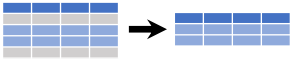

In [5]:
df = pd.DataFrame({"a":[4,5,6,6,np.nan], "b":[7,8,np.nan,9,9], "c":[10,11,12,np.nan,12]}, index=[1,2,3,4,5])
df

,a,b,c
1,4.0,7.0,10.0
2,5.0,8.0,11.0
3,6.0,NaN,12.0
4,6.0,9.0,NaN
5,NaN,9.0,12.0


### 1) head(n) / tail(n) : 위 / 아래 값을 n개 추출 ( default : 5 )

In [13]:
df.head()

,a,b,c
1,4.0,7.0,10.0
2,5.0,8.0,11.0
3,6.0,NaN,12.0
4,6.0,9.0,NaN
5,NaN,9.0,12.0


In [9]:
df.tail()

,a,b,c
1,4.0,7.0,10.0
2,5.0,8.0,11.0
3,6.0,NaN,12.0
4,6.0,9.0,NaN
5,NaN,9.0,12.0


### 2) sample(n) : DataFrame 내에서 임의의 n 개 index 를 가져옴 (default : 1)

In [10]:
df.sample()

,a,b,c
1,4.0,7.0,10.0


In [11]:
df.sample(n=3)

,a,b,c
3,6.0,NaN,12.0
2,5.0,8.0,11.0
5,NaN,9.0,12.0


In [14]:
df.sample(frac=0.5)

,a,b,c
3,6.0,NaN,12.0
5,NaN,9.0,12.0


### 3) nlargest / nsmallest
* n = val : val 만큼의 개수
* columns = "column Name" : 해당 Column 에서 가장 큰|작은 데이터

In [16]:
df.nlargest(2, "a")

,a,b,c
3,6.0,NaN,12.0
4,6.0,9.0,NaN


### 4) 중복 행 제거 : drop_duplicates()
* 해당 index 가 갖고 있는 Data 가 같은 경우, 중복행 제거 ( default : 중복행 중 뒷 행 )
* 바로 반영되는것이 아니며, inplace, 또는 새로운 변수에 담아 적용 가능

```
df.drop_duplicates(
    subset: Union[Hashable, Sequence[Hashable], NoneType] = None,    
    keep: Union[str, bool] = 'first',    
    inplace: bool = False,    
    ignore_index: bool = False,
) -> Union[ForwardRef('DataFrame'), NoneType]
```

In [17]:
df = pd.DataFrame({"a":[4,5,6,6], "b":[7,8,9,9], "c":[10,11,12,12]}, index=["a","b","c","d"])
df

,a,b,c
a,4,7,10
b,5,8,11
c,6,9,12
d,6,9,12


In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df

,a,b,c
a,4,7,10
b,5,8,11
c,6,9,12


### 5) 불린 인덱싱
* friend_age 에 비교 연산자를 사용하면 아래처럼 결과를 보여줌
* 따라서 그걸 이용해서 [] 안에 넣어주면 subset을 추출할 수 있음

In [21]:
friend_dict = [
    {
        "name":"John",
        "age":25,
        "job":"student"
    },
    {
        "name":"Nate",
        "age":34,
        "job":"teacher"
    },
    {
        "name":"Jenny",
        "age":30,
        "job":"developer"
    }
]
friend_df = pd.DataFrame(friend_dict)
friend_df

,name,age,job
0,John,25,student
1,Nate,34,teacher
2,Jenny,30,developer


In [22]:
friend_df.age > 25

0    False
1     True
2     True
Name: age, dtype: bool

In [23]:
friend_df[friend_df.age > 25]

,name,age,job
1,Nate,34,teacher
2,Jenny,30,developer


In [24]:
friend_df[friend_df["age"] > 25]

,name,age,job
1,Nate,34,teacher
2,Jenny,30,developer


In [26]:
# 나이가 25보다 많고, 이름이 Nate 인 행을 추출
friend_df[np.logical_and(friend_df.age > 25, friend_df.name == 'Nate')]

,name,age,job
1,Nate,34,teacher


In [27]:
# 이름이 Jenny 인 행 추출
friend_df[friend_df.name == 'Jenny']

,name,age,job
2,Jenny,30,developer


### 6) query() 

In [28]:
friend_df.query("age > 25")

,name,age,job
1,Nate,34,teacher
2,Jenny,30,developer


In [29]:
# 나이가 25보다 많고, 이름이 Nate 인 행을 추출
friend_df.query("age > 25" and "name == 'Nate'")

,name,age,job
1,Nate,34,teacher


#### [실습] friend_df

#### 1) head()

In [30]:
friend_df.head()

,name,age,job
0,John,25,student
1,Nate,34,teacher
2,Jenny,30,developer


#### 2) tail()

In [31]:
friend_df.tail()

,name,age,job
0,John,25,student
1,Nate,34,teacher
2,Jenny,30,developer


#### 3) nlargest()

In [32]:
friend_df.nlargest(1, "age")

,name,age,job
1,Nate,34,teacher


#### 4) nsmallest()

In [33]:
friend_df.nsmallest(1, "age")

,name,age,job
0,John,25,student


#### 5) sample()

In [34]:
friend_df.sample()

,name,age,job
2,Jenny,30,developer


In [35]:
friend_df.sample(n=2)

,name,age,job
2,Jenny,30,developer
0,John,25,student


In [36]:
friend_df.sample(frac=0.5)

,name,age,job
2,Jenny,30,developer
1,Nate,34,teacher


#### [실습] drop_duplicates()

In [37]:
student_list = {
    "name" : ["John","Nate","Edward","Zara","John"],
    "major" : ["Computer Science","Computer Science","Computer Science","Psychology","Computer Science"],
    "gender" : ["male","male","male","female","male"]
}
student_df = pd.DataFrame(student_list)
student_df

,name,major,gender
0,John,Computer Science,male
1,Nate,Computer Science,male
2,Edward,Computer Science,male
3,Zara,Psychology,female
4,John,Computer Science,male


In [38]:
student_df.drop_duplicates()

,name,major,gender
0,John,Computer Science,male
1,Nate,Computer Science,male
2,Edward,Computer Science,male
3,Zara,Psychology,female


In [39]:
student_df.duplicated() # 행 전체가 중복일 경우에, 중복으로 인식

0    False
1    False
2    False
3    False
4     True
dtype: bool

In [40]:
student_df.duplicated("major") # 중복에 대한 조건 부여

0    False
1     True
2     True
3    False
4     True
dtype: bool

In [41]:
student_df.drop_duplicates(subset='major') # 중복에 대한 조건 부여 후, 중복 제거

,name,major,gender
0,John,Computer Science,male
3,Zara,Psychology,female
